# Study the data statistics of the pep-3k dataset (dev).
29.11.2023

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Please replace the following paths with your own paths if you are using different ones.
PROJECT_PATH = "<root_dir_of_this_repo>"
DATA_PATH = PROJECT_PATH + "datasets/pep-3k/train-dev-test-split/"
CACHE_PATH = PROJECT_PATH + "cache/"

## Dev

In [4]:
dev_set_df = pd.read_csv(DATA_PATH + "dev.csv", sep=',')
dev_set_df

,label,text
0,0,elephant vomit boat
1,1,tape attach sticker
2,1,knife dig bike
3,1,girl cut grape
4,1,policeman halt ball
...,...,...
301,0,girl slide water
302,0,plant bury air
303,0,hand roll plane
304,1,cup spill water


### Check texts

In [5]:
texts = dev_set_df['text'].tolist()
print(len(texts))
texts_set = list(set(texts))
print(len(texts_set))

306
306


In [6]:
# Get vocabulary from texts.

from itertools import chain
words = [text.split(" ") for text in texts]
words = list(chain(*words))
print(len(words))

vocab = list(set(words))
print(len(vocab))

918
330


### Check labels

In [7]:
labels = dev_set_df['label'].tolist()
print(len(labels))
labels_set = list(set(labels))
print(len(labels_set))
labels_set

306
2


[0, 1]

In [8]:
label_counter = dict(Counter(labels))

# Sort the data in descending order.
label_counter = {k: v for k, v in sorted(label_counter.items(), key=lambda item: item[1], reverse=True)}
label_counter

{0: 153, 1: 153}

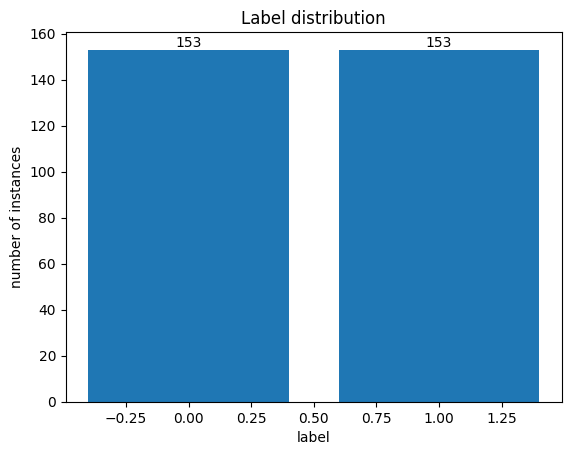

In [9]:
# Create a bar diagram
plt.bar(label_counter.keys(), label_counter.values())

# Add title and labels
plt.title('Label distribution')
plt.xlabel('label')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in label_counter.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()